In [23]:
%%HTML
<style>
div.prompt {display:none}
</style>

# Regresión multiple utilizando grandiente descendente de TensorFlow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import sys

In [2]:
sys.path.append('/home/pedro/git/ElCuadernillo/ElCuadernillo/20160220_TensorFlowRegresionMultiple')

In [3]:
import gradient_descent_tensorflow as gdt

## Input
Generamos la muestra de grado 5

Coeficientes:  [ 3.36412627 -1.82955413  3.73675111  1.24001437 -0.97937945]


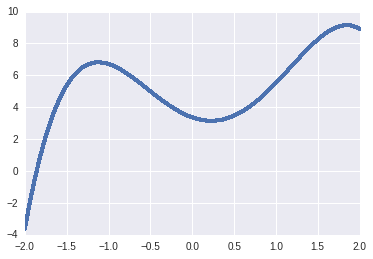

In [10]:
grado=5
tamano=100000
x,y,coeficentes=gdt.generar_muestra(grado,tamano)
print ("Coeficientes: ",coeficentes)
plt.plot(x,y,'.')

## Problema
**Calcular los coeficientes que mejor se ajusten a la muestra sabiendo que es de grado 5**

Generamos la matriz de coeficientes de grado 5

In [11]:
train_x=gdt.generar_matriz_coeficientes(x,grado) # MatrizA
train_y=np.reshape(y,(y.shape[0],-1)) # VectorColumna

### Solucion 1: Por medio *gradient descent*
Se va a calcular minimizando *ecm* por medio de *GradientDescent*

In [12]:
pesos_gd,ecm,t_c_gd=gdt.regression_gradient_descent(train_x,train_y,diff_error_parada=1e-4)

Iteracion 0:
	Pesos: [ 0.10424843  0.03057502  0.14977624  0.10966295  0.34144267]
	ecm: 32.80121612548828
Iteracion 200:
	Pesos: [ 3.78006744 -0.8905564   2.53785586  0.90441191 -0.63854468]
	ecm: 0.37401488423347473
Iteracion 400:
	Pesos: [ 3.78262925 -1.39037919  2.95099735  1.08305097 -0.77321088]
	ecm: 0.11477094888687134
Iteracion 600:
	Pesos: [ 3.66502023 -1.62414908  3.18549418  1.16660154 -0.83559871]
	ecm: 0.045448631048202515
Iteracion 745:
	Pesos: [ 3.59795499 -1.71115661  3.30899501  1.19769847 -0.86785138]
	ecm: 0.02492544986307621
-------------------------------------------------------------------------
Iteracion 745:
	Pesos: [ 3.59795499 -1.71115661  3.30899501  1.19769847 -0.86785138]
	ecm: 0.02492544986307621
-------------------------------------------------------------------------
Tiempo de calculo: 11.62337064743042


Mostramos la curva de error por iteracion

### Solución 2: Por medio *stochastic gradient descent*
Mucho mas rápido para grandes volumenes de datos

In [13]:
pesos_sgd,ecm,t_c_sgd=gdt.regression_stochastic_gradient_descent(train_x,train_y,1000,diff_error_parada=1e-4)

Iteracion 200:
	Pesos: [ 3.78643465 -0.90494144  2.55068541  0.91293401 -0.6358999 ]
	ecm: 0.3388676345348358
Iteracion 400:
	Pesos: [ 3.7741859  -1.39192545  2.95301437  1.08441734 -0.77291107]
	ecm: 0.149084210395813
-------------------------------------------------------------------------
Iteracion 516:
	Pesos: [ 3.70458388 -1.54541707  3.09809303  1.14244986 -0.81567252]
	ecm: 0.06473730504512787
-------------------------------------------------------------------------
Tiempo de calculo: 0.5160777568817139


## Resultados:

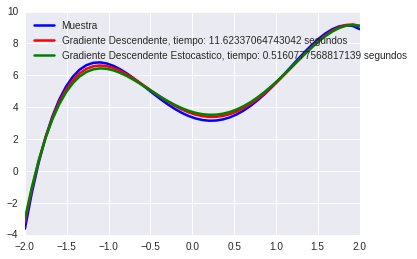

In [18]:
#http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html
x_minimo = np.linspace(-2,2,50)
y_target=np.polynomial.polynomial.polyval(x_minimo, coeficentes).ravel()
y_gradiente_descendente=np.polynomial.polynomial.polyval(x_minimo, pesos_gd).ravel()
y_gradiente_descendente_estocastico=np.polynomial.polynomial.polyval(x_minimo, pesos_sgd).ravel()

plt.plot(x_minimo, y_target, color="blue", linewidth=2.5, linestyle="-", label="Muestra")
plt.plot(x_minimo, y_gradiente_descendente, color="red",  linewidth=2.5, linestyle="-", label="Gradiente Descendente, tiempo: {} segundos".format(t_c_gd))
plt.plot(x_minimo, y_gradiente_descendente_estocastico, color="green",  linewidth=2.5, linestyle="-", label="Gradiente Descendente Estocastico, tiempo: {} segundos".format(t_c_sgd))

plt.legend(loc='upper left')

plt.show()